# Import Libraries

In [2]:
#%matplotlib notebook

In [3]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.legend_handler

In [4]:
#read csv files
city_data = "./city_data.csv"
ride_data = "./ride_data.csv"
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

In [5]:
#merge the data in combine_df
combined_df = pd.merge(city_df, ride_df, on = "city")
#combined_df.head()

# Bubble Plot of Ride Sharing Data

In [6]:
#clean data so it only includes city, driver_count, type, and fare 
#(that is the only information we need for bubble chart)
clean_df = combined_df[["city", "driver_count", "type", "fare"]].set_index("type")


In [7]:
#create df for each type of city
rural_df =clean_df.loc["Rural"]
urban_df = clean_df.loc["Urban"]
suburban_df = clean_df.loc["Suburban"]

In [8]:
#we will need ride count for x axis. To find this I will group data by city and add a count column which 
#will count the number of rides per city. 
rural_ride = rural_df.groupby(["city"]).size().to_frame(name = 'count').reset_index()
urban_ride = urban_df.groupby(["city"]).size().to_frame(name = 'count').reset_index()
suburban_ride = suburban_df.groupby(["city"]).size().to_frame(name = 'count').reset_index()
#rural_ride.head()

In [9]:
#define the x axis
x_rural = rural_ride["count"]
x_urban = urban_ride["count"]
x_suburban = suburban_ride["count"]

In [10]:
#create df for each type of city for y (fares)
clean_df.insert(3, "count", 1)
rural_fare=clean_df.loc["Rural"]
urban_fare=clean_df.loc["Urban"]
suburban_fare=clean_df.loc["Suburban"]

In [11]:
#groupby city to find fares by city
rural_fare = rural_fare.groupby("city")
urban_fare = urban_fare.groupby("city")
suburban_fare = suburban_fare.groupby("city")

In [12]:
#find total fares
rural_sum = rural_fare.sum()
urban_sum=urban_fare.sum()
suburban_sum=suburban_fare.sum()

In [13]:
#iterate through the rows, adding a column for average fare and find the average fare for each city. Store avg. 
x = 0
for index, row in rural_sum.iterrows():
    x = rural_sum["fare"]/rural_sum["count"]
    rural_sum["avg fare"] = x
    x= 0

In [14]:
x = 0
for index, row in urban_sum.iterrows():
    x = urban_sum["fare"]/urban_sum["count"]
    urban_sum["avg fare"] = x
    x= 0

In [15]:
x = 0
for index, row in suburban_sum.iterrows():
    x = suburban_sum["fare"]/suburban_sum["count"]
    suburban_sum["avg fare"] = x
    x= 0

In [16]:
#define y axis
y_rural = rural_sum["avg fare"]
y_urban = urban_sum["avg fare"]
y_suburban = suburban_sum["avg fare"]

In [17]:
#we also need to driver count for the size of the bubbles (new groupby targetting driver_count)
driver_count = clean_df.groupby(["city","driver_count", "type"]).size().to_frame(name = "count").reset_index()
driver_count = driver_count.set_index("type")

In [18]:
#create separate dfs for each type of city
driver_rural = driver_count.loc["Rural"]
driver_urban = driver_count.loc["Urban"]
driver_suburban = driver_count.loc["Suburban"]

In [19]:
#groupby city to get total driver_count
z_rural= driver_rural.groupby("city")
z_urban = driver_urban.groupby("city")
z_suburban = driver_suburban.groupby("city")

In [20]:
#specify the driver_count column
z_rural = z_rural["driver_count"]
z_urban = z_urban["driver_count"]
z_suburban = z_suburban["driver_count"]

In [21]:
#find the sum for driver_count for each city
#define s value
s_rural = z_rural.sum()
s_urban = z_urban.sum()
s_suburban = z_suburban.sum()

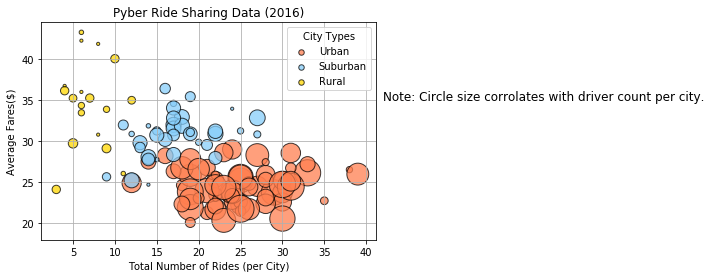

In [22]:
#create bubble plot
rural = plt.scatter(x_rural, y_rural, s=s_rural*10, alpha = 0.75, color = "gold", edgecolor = "black", linewidth = 1, label = "Rural")
urban = plt.scatter(x_urban, y_urban, s=s_urban*10, alpha = 0.75, color = "coral", edgecolor = "black", linewidth = 1, label = "Urban")
suburban = plt.scatter(x_suburban, y_suburban, s=s_suburban*10, alpha = 0.75, color = "lightskyblue", edgecolor = "black", linewidth = 1, label = "Suburban")
#add labels
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fares($)")
plt.title("Pyber Ride Sharing Data (2016)")
#add legends
lgnd = plt.legend(handles = [urban,suburban, rural], title = "City Types", loc = "upper right")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
#add note
note = "Note: Circle size corrolates with driver count per city."
plt.text(42,35, note, fontsize = 12)

plt.grid()
plt.savefig("bubble_pyber.png")
plt.show()

# Total Fares by City Type

In [23]:
#groupby the combined_df by city type
combined_df = combined_df.set_index("type")

In [24]:
#groupby type
grouped_type = combined_df.groupby("type")
type_sum = grouped_type.sum()

In [25]:
#create a dataframe from the groupby data and set index to type
typefare_df = type_sum.groupby(["type","fare"]).size().to_frame(name = "count").reset_index()
typefare_df = typefare_df.set_index("type")

In [26]:
#grab the total fares of each city type
rural_percent = typefare_df.loc["Rural"]["fare"]
urban_percent = typefare_df.loc["Urban"]["fare"]
suburban_percent = typefare_df.loc["Suburban"]["fare"]

In [27]:
#list variables for the pie plot
city_types = "Suburban", "Urban", "Rural"
fares = [suburban_percent, urban_percent, rural_percent]
colors = ["lightskyblue", "lightcoral", "gold"]
explode = 0, 0.1, 0

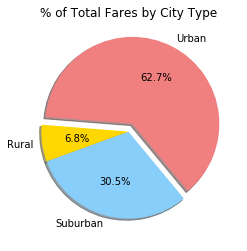

In [28]:
#make pie plot
plt.pie(fares, explode=explode, labels = city_types, colors=colors, autopct="%1.1f%%", shadow = True, startangle = 200)
plt.title("% of Total Fares by City Type")
plt.savefig("fares_pie.png")
plt.show()

# Total Rides by City Type

In [29]:
#create data frame that represents the ride count per city type
typeride_df = combined_df.groupby(["type"]).size().to_frame(name = "ride count").reset_index()
typeride_df = typeride_df.set_index("type")

In [30]:
#grab the ride count for each city type
rural_ride = typeride_df.loc["Rural"]["ride count"]
urban_ride = typeride_df.loc["Urban"]["ride count"]
suburban_ride = typeride_df.loc["Suburban"]["ride count"]

In [31]:
#define pie plot variables
city_types = "Suburban", "Urban", "Rural"
rides = [suburban_ride, urban_ride, rural_ride]
colors = ["lightskyblue", "lightcoral", "gold"]
explode = 0, 0.1, 0

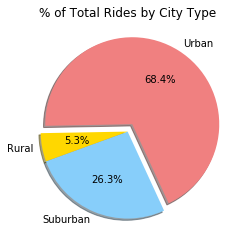

In [32]:
#create pie plot
plt.pie(rides, explode=explode, labels = city_types, colors=colors, autopct="%1.1f%%", shadow = True, startangle = 200)
plt.title("% of Total Rides by City Type")
plt.savefig("rides_pie.png")
plt.show()

# Total Drivers by City Type

In [33]:
#grad driver_count from before, but be sure to drop unnecessary data (city and count)
driver_count = driver_count.drop("city", axis = 1)
driver_count = driver_count.drop("count", axis = 1)

In [34]:
#grab the count of drivers per city type
rural_driver = driver_count.loc["Rural"]["driver_count"]
urban_driver = driver_count.loc["Urban"]["driver_count"]
suburban_driver = driver_count.loc["Suburban"]["driver_count"]

In [35]:
#define variables for pie plot
city_types = "Suburban", "Urban", "Rural"
drivers = [suburban_driver.sum(), urban_driver.sum(), rural_driver.sum()]
colors = ["lightskyblue", "lightcoral", "gold"]
explode = 0, 0.1, 0

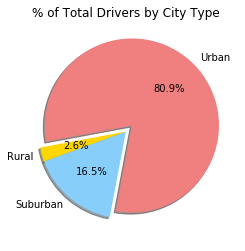

In [36]:
#create pie plot
plt.pie(drivers, explode=explode, labels = city_types, colors=colors, autopct="%1.1f%%", shadow = True, startangle = 200)
plt.title("% of Total Drivers by City Type")
plt.savefig("drivers_pie.png")
plt.show()